# Install DBT using Miniconda

In [22]:
!which dbt

/home/lthulasidhar/miniconda3/envs/p4-env/bin/dbt


# Section 1: Setup environment 

Google sheets source:https://docs.google.com/spreadsheets/d/1EOykPOCrZB_l0wNlPSDpIC_JAWBRHRNofPJKyyooxV8/edit?gid=1807517008#gid=1807517008

# Use dbt to transform the column names to single word or two-word names with "_" separator and create a view named transform_survey.

In [243]:
!cat ~/.dbt/profiles.yml | grep -v 'password'

p4_data_pipeline:
  target: dev # default target; can be switched using --target option of dbt run
  outputs:
    dev:
      type: snowflake
      account: npdsfyv-gw12055   # Example: <account_name>.<region>.<cloud_provider>
      user: LEKSHMI288
      role: ACCOUNTADMIN
      database: SURVEY_DATABASE 
      warehouse: P4_WAREHOUSE
      schema: SURVEY_SCHEMA
      threads: 10



In [244]:
!cat ~/p4_data_pipeline/models/schema.yml

version: 2

sources:
  - name: survey_data
    database: SURVEY_DATABASE
    schema: SURVEY_SCHEMA
    tables:
      - name: SURVEY
      - name: TRADING_BOOKS
      - name: WEIGHTS_TABLE

  




In [31]:
!cat ~/p4_data_pipeline/models/staging/transform_survey.sql

WITH raw_survey AS (
    SELECT *
    FROM {{source('survey_data', 'SURVEY')}}
),

survey_transformed AS (
    SELECT
        {{adapter.quote('TIMESTAMP') }} AS TIMESTAMP,
        {{adapter.quote('EMAIL_ADDRESS') }} AS email,
	{{adapter.quote('WHAT_IS_YOUR_CURRENT_STANDING') }} AS current_standing,
	{{adapter.quote('WHICH_BEST_DESCRIBES_YOUR_PRIMARY_MAJOR_OR_FIELD_OF_STUDY_IF_YOU_HAVE_MORE_THAN_ONE_MAJOR_PLEASE_SPECIFY_OTHER_MAJORS_AS_PART_OF_THE_NEXT_QUESTION_') }} AS primary_major,
        {{adapter.quote('IF_YOU_HAVE_SECONDARY_MAJORS_PLEASE_LIST_THEM_HERE_SEPARATED_BY_A_COMMA_') }} AS secondary_majors,
        {{adapter.quote('WHAT_FACTOR_INFLUENCES_YOUR_COURSE_SELECTION_THE_MOST_') }} AS why_attending,
        {{adapter.quote('WHAT_IS_THE_5_DIGIT_ZIP_CODE_OF_YOUR_RESIDENCE_WHILE_ATTENDING_CLASSES_IF_YOU_ARE_NOT_SURE_CHECK_HERE_HTTPS_TOOLS_USPS_COM_ZIP_CODE_LOOKUP_HTM_BYADDRESS_') }} AS zip_code,
        {{ adapter.quote('WHAT_IS_YOUR_AGE_') }} AS age,
	{{adapter.quote('ARE_YOU_A_RU

# Section 2: Custom student dataset analysis 

In [32]:
import snowflake.connector
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [33]:
# Read Snowflake password
with open("snowflake_password", "r") as file:
    snowflake_password = file.read()
    snowflake_password = snowflake_password.strip()


In [34]:
conn = snowflake.connector.connect(
    user='LEKSHMI288', 
    password=snowflake_password, 
    account='NPDSFYV-GW12055' 
)

cursor = conn.cursor()


In [61]:
cursor.execute("USE DATABASE SURVEY_DATABASE;")
cursor.execute("USE SCHEMA SURVEY_SCHEMA;")

df = pd.read_sql("""
SELECT * 
FROM TRANSFORM_SURVEY
""", conn)
df


/tmp/ipykernel_1278/2890692216.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


,TIMESTAMP,EMAIL,CURRENT_STANDING,PRIMARY_MAJOR,SECONDARY_MAJORS,WHY_ATTENDING,ZIP_CODE,AGE,RUNNER,PROCRASTINATOR,OWNED_PET,FAVORITE_HOBBY,LEISURE_ACTIVITY,FAVORITE_PIZZATOPPING,EARLYBIRD_NIGHT_OWL,AIRBYTE_EXTRACTEDAT,AIRBYTE_GENERATIONID,AIRBYTE_META,AIRBYTE_RAWID
0,3/19/2025 13:29:38,igallucci@wisc.edu,Senior,Data Science,None,Interest in the subject,53703,22,No,Maybe,Yes,Watching Movies,Working on a hobby,none (just cheese),no preference,2025-04-04 00:20:48.003000+00:00,4,"{\n ""changes"": [],\n ""sync_id"": 32527220\n}",49e8df7e-f176-4fdb-8dbe-46cce94850e0
1,3/19/2025 13:29:54,jwcramer2@wisc.edu,Senior,Data Science,None,Career relevance,53726,21,No,No,Yes,Playing the piano.,Working on a hobby,basil/spinach,night owl,2025-04-04 00:20:48.003000+00:00,4,"{\n ""changes"": [],\n ""sync_id"": 32527220\n}",f0b617e0-7bb6-4e28-965b-fd0959410c9b
2,3/19/2025 13:30:35,jzhang2752@wisc.edu,Sophomore,Data Science,Statistics,Graduation requirements,53706,20,No,Yes,Yes,Dance,Sleeping,pepperoni,night owl,2025-04-04 00:20:48.004000+00:00,4,"{\n ""changes"": [],\n ""sync_id"": 32527220\n}",d499f4ca-f15d-4a0c-a7c7-b99f5a0e702e
3,3/19/2025 13:29:05,entackett@wisc.edu,Senior,Mathematics/AMEP,None,Career relevance,53715,20,No,Maybe,No,Learning mathematics in my free time,Sleeping,pepperoni,night owl,2025-04-04 00:20:48.003000+00:00,4,"{\n ""changes"": [],\n ""sync_id"": 32527220\n}",05b587b3-b9fc-4151-a460-98967e3d8c69
4,3/21/2025 11:17:35,snegus@wisc.edu,Junior,Data Science,Digital Media Analytics,Interest in the subject,53703,21,Yes,Maybe,Yes,Downhill skiing,Working on a hobby,mushroom,night owl,2025-04-04 00:20:48.010000+00:00,4,"{\n ""changes"": [],\n ""sync_id"": 32527220\n}",2dc00efb-c5c0-4f20-8bb4-92abdde5f100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,3/19/2025 13:43:49,epajanustan@wisc.edu,Sophomore,Data Science,None,Career relevance,53715,20,No,Yes,Yes,Sports,Sleeping,pepperoni,night owl,2025-04-04 00:20:48.004000+00:00,4,"{\n ""changes"": [],\n ""sync_id"": 32527220\n}",3293cffd-d319-4016-a2ba-280ae7da8f71
155,4/2/2025 2:28:40,bzhang536@wisc.edu,Senior,Computer Science,None,Course workload,53703,19,Yes,Yes,Yes,basketball,Sleeping,pineapple,night owl,2025-04-04 00:20:48.024000+00:00,4,"{\n ""changes"": [],\n ""sync_id"": 32527220\n}",2412fa8e-d23f-49e8-9453-1ad66c2f71e1
156,3/21/2025 13:56:04,zzhang2682@wisc.edu,Junior,Mathematics/AMEP,data science,Interest in the subject,53703,22,Yes,Yes,No,sports,Reading for fun,pineapple,night owl,2025-04-04 00:20:48.013000+00:00,4,"{\n ""changes"": [],\n ""sync_id"": 32527220\n}",31c0cf29-66e3-44a9-9c80-3c51b555ccd9
157,3/19/2025 18:30:04,txu223@wisc.edu,Senior,Computer Science,"Data Science, Mathematics",Interest in the subject,53703,23,No,No,Yes,IDK,Working on a hobby,basil/spinach,night owl,2025-04-04 00:20:48.004000+00:00,4,"{\n ""changes"": [],\n ""sync_id"": 32527220\n}",dc19d7a4-7126-4e82-8308-1e2dd4872f0a


# What is the distribution of standing levels of students enrolled in CS639 ?  

/tmp/ipykernel_1278/3674573071.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


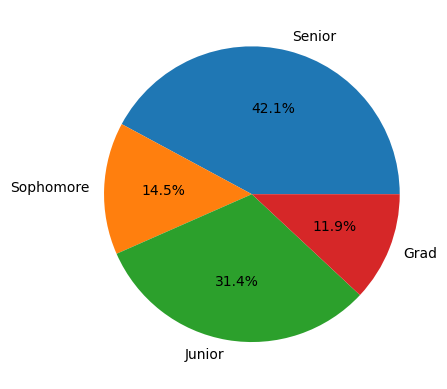

,CURRENT_STANDING,COUNTS
0,Senior,67
1,Sophomore,23
2,Junior,50
3,Grad,19


In [125]:

df = pd.read_sql("""
SELECT CURRENT_STANDING, COUNT(*) AS COUNTS FROM TRANSFORM_SURVEY
GROUP BY CURRENT_STANDING
""", conn)
plt.pie(df['COUNTS'], labels=df['CURRENT_STANDING'], autopct='%1.1f%%')
plt.show()
df

Most of the class consists of Seniors and Juniors, making up over 70% of the students. Sophomores are about 14.5% and Graduate students make up around 12% of the class, indicating relatively lower participation from the graduate cohort.


#  How many senior students in the class are majoring in Data Science, either as their primary or secondary major?


In [126]:

df = pd.read_sql("""
SELECT COUNT(*) AS COUNTS FROM TRANSFORM_SURVEY
WHERE CURRENT_STANDING ='Senior' AND (PRIMARY_MAJOR ='Data Science' OR SECONDARY_MAJORS LIKE '%Data Science%')
""", conn)
df

/tmp/ipykernel_1278/2176950.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


,COUNTS
0,37


#  Which current standing class has the highest proportion of students who likes to sleep during their leisure time?

In [200]:

df= pd.read_sql("""
SELECT CURRENT_STANDING, LEISURE_ACTIVITY, 
COUNT(*) AS Counts,(SELECT COUNT(*) FROM TRANSFORM_SURVEY
WHERE CURRENT_STANDING = SLEEPTABLE.CURRENT_STANDING) AS TOTAL_STUDENTS_PER_STANDING,COUNT(*)/(SELECT COUNT(*) FROM TRANSFORM_SURVEY
WHERE CURRENT_STANDING = SLEEPTABLE.CURRENT_STANDING) AS PROPORTION
FROM TRANSFORM_SURVEY AS SLEEPTABLE
WHERE LEISURE_ACTIVITY='Sleeping'
GROUP BY CURRENT_STANDING,LEISURE_ACTIVITY
ORDER BY PROPORTION DESC
""", conn)
df


/tmp/ipykernel_1278/4068917890.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df= pd.read_sql("""


,CURRENT_STANDING,LEISURE_ACTIVITY,COUNTS,TOTAL_STUDENTS_PER_STANDING,PROPORTION
0,Sophomore,Sleeping,9,23,0.391304
1,Grad,Sleeping,6,19,0.315789
2,Junior,Sleeping,14,50,0.280000
3,Senior,Sleeping,14,67,0.208955


Around 40% of the sophomores enrolled likes to sleep in their leisure time. Whereas only around 21% seniors enrolled in this class likes to sleep during their leisure time. 

# What is the favorite leisure activity of the student group that has the lowest proportion of students who like to sleep during their leisure time?

/tmp/ipykernel_1278/3397698743.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


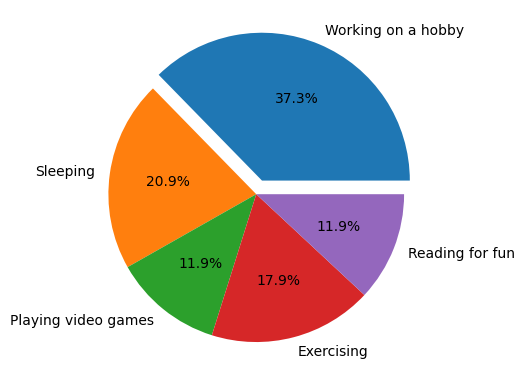

,LEISURE_ACTIVITY,COUNTS
0,Working on a hobby,25
1,Sleeping,14
2,Playing video games,8
3,Exercising,12
4,Reading for fun,8


In [176]:
# From Q12, this is seniors. 

df = pd.read_sql("""
SELECT LEISURE_ACTIVITY, COUNT(*) AS COUNTS FROM TRANSFORM_SURVEY
WHERE CURRENT_STANDING ='Senior'
GROUP BY LEISURE_ACTIVITY
""", conn)
counts=df['COUNTS']
explode = [0.1 if count == max(counts) else 0 for count in counts]
plt.pie(df['COUNTS'], labels=df['LEISURE_ACTIVITY'], autopct='%1.1f%%',explode=explode)
plt.show()
df

# What proportion of  runners are procrastinators? Any interesting correlation with running habits and procrastination?

In [196]:

df = pd.read_sql("""
SELECT PROCRASTINATOR, COUNT(*) AS NUMBER_OF_STUDENTS, 
COUNT(*)/(SELECT COUNT(*) FROM TRANSFORM_SURVEY WHERE RUNNER='Yes') AS PROPORTION
FROM TRANSFORM_SURVEY
WHERE RUNNER='Yes'
GROUP BY RUNNER, PROCRASTINATOR
ORDER BY PROPORTION DESC
""", conn)

df


/tmp/ipykernel_1278/182126907.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


,PROCRASTINATOR,NUMBER_OF_STUDENTS,PROPORTION
0,Yes,28,0.466667
1,Maybe,17,0.283333
2,No,15,0.250000


47% of runners are procrastinators. 

To know if there are any interesting correlation, we can modify the code to include those who don't run.

/tmp/ipykernel_1278/3283296288.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


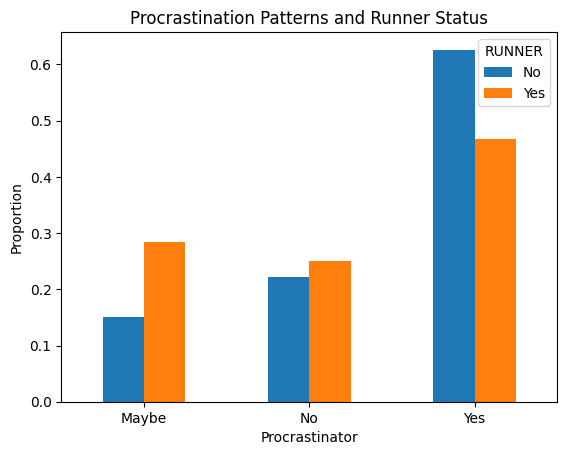

,RUNNER,PROCRASTINATOR,COUNTS,STUDENTS_IN_EACH_RUNNING_CAT,PROPORTION
0,No,Yes,62,99,0.626263
1,Yes,Yes,28,60,0.466667
2,Yes,Maybe,17,60,0.283333
3,Yes,No,15,60,0.250000
4,No,No,22,99,0.222222
5,No,Maybe,15,99,0.151515


In [231]:
df = pd.read_sql("""
SELECT RUNNER, PROCRASTINATOR, COUNT(*) AS COUNTS, (SELECT COUNT(*) FROM TRANSFORM_SURVEY WHERE RUNNER = RUNNERS.RUNNER) AS STUDENTS_IN_EACH_RUNNING_CAT,
       COUNT(*) / (SELECT COUNT(*) FROM TRANSFORM_SURVEY WHERE RUNNER = RUNNERS.RUNNER) AS PROPORTION
FROM TRANSFORM_SURVEY AS RUNNERS
GROUP BY RUNNER, PROCRASTINATOR
ORDER BY PROPORTION DESC
""", conn)

pivot = df.pivot(index='PROCRASTINATOR', columns='RUNNER', values='PROPORTION')
pivot.plot(kind='bar')
plt.title('Procrastination Patterns and Runner Status')
plt.xlabel('Procrastinator')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()
df

We can see that among the students who procrastinate, 62% of them are non-runners as opposed to 46% being runners. Whereas among those who don't procrastinate, the proportion of runners and non-runners are more or less the same. Those who sometimes procrastinate are mostly runners.  

Running requires quite a bit of discipline and planning, traits which could carry over into one's day to day routine. It makes sense why most procrastinators are non-runners. Those who answered "maybe" are mostly runners. They could be more selfaware and probably considered occasional slip-ups while answering the form. Those who don't procrastinate have roughly the same percentage of runners and non-runners, means there is no strong link between running and 'not procrastinating'.

# Any interesting correlation with running habits and sleeping habits?

/tmp/ipykernel_1278/2018813862.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


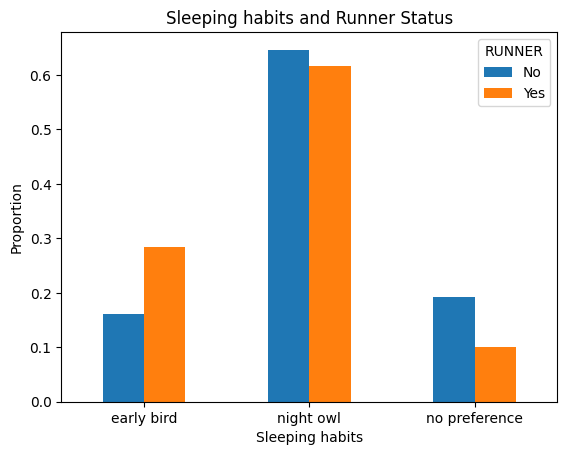

,RUNNER,SLEEPING_HABITS,COUNTS,STUDENTS_IN_EACH_RUNNING_CAT,PROPORTION
0,No,night owl,64,99,0.646465
1,Yes,night owl,37,60,0.616667
2,Yes,early bird,17,60,0.283333
3,No,no preference,19,99,0.191919
4,No,early bird,16,99,0.161616
5,Yes,no preference,6,60,0.100000


In [234]:

df = pd.read_sql("""
SELECT RUNNER, EARLYBIRD_NIGHT_OWL AS SLEEPING_HABITS, COUNT(*) AS COUNTS, (SELECT COUNT(*) FROM TRANSFORM_SURVEY WHERE RUNNER = RUNNERS.RUNNER) AS STUDENTS_IN_EACH_RUNNING_CAT,
       COUNT(*) / (SELECT COUNT(*) FROM TRANSFORM_SURVEY WHERE RUNNER = RUNNERS.RUNNER) AS PROPORTION
FROM TRANSFORM_SURVEY AS RUNNERS
GROUP BY RUNNER, SLEEPING_HABITS
ORDER BY PROPORTION DESC
""", conn)

pivot = df.pivot(index='SLEEPING_HABITS', columns='RUNNER', values='PROPORTION')
pivot.plot(kind='bar')
plt.title('Sleeping habits and Runner Status')
plt.xlabel('Sleeping habits')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()
df

Night owls dominate in the classroom regardless of their running status. However, most of the early birds are runners. Those who have no preference are dominated by non-runners. Could be pointing towards runners being more disciplined. 

#  What is the most common reason for the students to take this class? How many students are attending this class due to its career relevance? 

/tmp/ipykernel_1278/2652141807.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


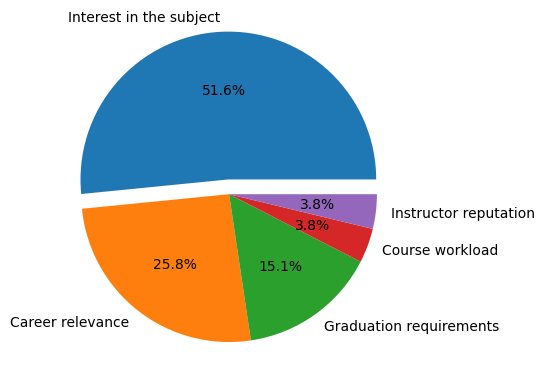

,WHY_ATTENDING,COUNTS
0,Interest in the subject,82
1,Career relevance,41
2,Graduation requirements,24
3,Course workload,6
4,Instructor reputation,6


In [242]:
df = pd.read_sql("""
SELECT WHY_ATTENDING,COUNT(*) AS COUNTS FROM TRANSFORM_SURVEY
GROUP BY WHY_ATTENDING
ORDER BY COUNTS DESC
""", conn)
counts=df['COUNTS']
explode = [0.1 if count == max(counts) else 0 for count in counts]
plt.pie(df['COUNTS'], labels=df['WHY_ATTENDING'], autopct='%1.1f%%',explode=explode)
plt.show()
df

Around half of the class is taking CS639 due to interest in the subject. A quarter of the class is taking this course due to career relevance.

# Section 3: Stock and foreign exchange (fx) dataset analysis 

# Configure ~/.dbt/profiles.yml for STOCK_DB

In [36]:
!cat ~/.dbt/profiles.yml | grep -v 'password'

p4_data_pipeline:
  target: dev # default target; can be switched using --target option of dbt run
  outputs:
    dev:
      type: snowflake
      account: npdsfyv-gw12055   # Example: <account_name>.<region>.<cloud_provider>
      user: LEKSHMI288
      role: ACCOUNTADMIN
      database: SURVEY_DATABASE 
      warehouse: P4_WAREHOUSE
      schema: SURVEY_SCHEMA
      threads: 10

    stock_db:
      type: snowflake
      account: npdsfyv-gw12055  # Example: <account_name>.<region>.<cloud_provider>
      user: LEKSHMI288
      role: ACCOUNTADMIN
      database: STOCKDB  # another database
      warehouse: P4_WAREHOUSE
      schema: STOCK_SCHEMA
      threads: 10


# Update models/schema.yml file to include new sources for STOCK_DB tables 

In [37]:
!cat ~/p4_data_pipeline/models/schema.yml

version: 2

sources:
  - name: survey_data
    database: SURVEY_DATABASE
    schema: SURVEY_SCHEMA
    tables:
      - name: SURVEY
      - name: TRADING_BOOKS
      - name: WEIGHTS_TABLE

  
  - name: stock_by_day
    database: STOCK_TRACKING_US_STOCK_PRICES_BY_DAY
    schema: STOCK
    tables:
      - name: US_STOCK_METRICS

  - name: fx_by_day
    database: FOREX_TRACKING_CURRENCY_EXCHANGE_RATES_BY_DAY
    schema: STOCK
    tables:
      - name: FOREX_METRICS



# Create dbt_project.yml file in your dbt project directory --- p4_data_pipeline 

In [38]:
!cat ~/p4_data_pipeline/dbt_project.yml


# Name your project! Project names should contain only lowercase characters
# and underscores. A good package name should reflect your organization's
# name or the intended use of these models
name: 'p4_data_pipeline'
version: '1.0.0'

# This setting configures which "profile" dbt uses for this project.
profile: 'p4_data_pipeline'

# These configurations specify where dbt should look for different types of files.
# The `model-paths` config, for example, states that models in this project can be
# found in the "models/" directory. You probably won't need to change these!
model-paths: ["models"]
analysis-paths: ["analyses"]
test-paths: ["tests"]
seed-paths: ["seeds"]
macro-paths: ["macros"]
snapshot-paths: ["snapshots"]

clean-targets:         # directories to be removed by `dbt clean`
  - "target"
  - "dbt_packages"


# Configuring models
# Full documentation: https://docs.getdbt.com/docs/configuring-models


models:
  p4_data_pipeline:
    # Config indicated by + and applies to all fi

# Creating staging tables for FX and Stock 

In [39]:
!cat ~/p4_data_pipeline/models/staging/staging_valid_fx_tickers.sql


SELECT DISTINCT TRADE_DATE,TICKER 
FROM {{ source('survey_data', 'TRADING_BOOKS') }}
WHERE desk = 'FX Desk'


In [40]:
!cat ~/p4_data_pipeline/models/staging/staging_valid_stock_tickers.sql

SELECT DISTINCT TRADE_DATE, TICKER
FROM {{ source('survey_data', 'TRADING_BOOKS') }}
WHERE desk = 'Equity Desk'


In [41]:
!cat ~/p4_data_pipeline/models/staging/staging_valid_fx_info.sql

SELECT RUN_DATE, CURRENCY_PAIR_NAME AS TICKER, OPEN,CLOSE,HIGH,LOW
FROM {{source('fx_by_day','FOREX_METRICS')}} AS forex
INNER JOIN {{ref("staging_valid_fx_tickers")}} AS validtick 
ON forex.RUN_DATE=validtick.TRADE_DATE AND forex.CURRENCY_PAIR_NAME=validtick.TICKER


In [42]:
!cat ~/p4_data_pipeline/models/staging/staging_valid_stock_info.sql

SELECT RUN_DATE, stock.TICKER, OPEN,CLOSE,HIGH,LOW
FROM {{source('stock_by_day','US_STOCK_METRICS')}} AS stock
INNER JOIN {{ref("staging_valid_stock_tickers")}} AS validtick
ON stock.RUN_DATE=validtick.TRADE_DATE AND stock.TICKER=validtick.TICKER


# Create staging table for trading pairs

In [43]:
!cat ~/p4_data_pipeline/models/staging/staging_buy_sell_joint.sql

SELECT buytrading.TRADE_ID as Trade_id, buytrading.TRADE_DATE AS Trade_date, buytrading.TRADER_NAME,buytrading.Desk,
buytrading.TICKER AS Ticker, buytrading.QUANTITY as Quantity_buy,buytrading.PRICE AS Price_buy, selltrading.QUANTITY as Quantity_sell, selltrading.PRICE AS Price_sell 
FROM {{ source('survey_data', 'TRADING_BOOKS')}} AS buytrading
INNER JOIN {{ source('survey_data', 'TRADING_BOOKS')}} AS selltrading 
ON buytrading.TRADER_NAME=selltrading.TRADER_NAME AND
buytrading.TRADE_DATE=selltrading.TRADE_DATE
WHERE buytrading.TRADE_TYPE='BUY' AND selltrading.TRADE_TYPE='SELL'
ORDER BY buytrading.TRADE_ID


# Create a fact Table for trading data 


In [44]:
!cat ~/p4_data_pipeline/models/marts/fact_tab_trading.sql

SELECT Trade_id, price_buy* quantity_buy AS Buy_money, price_sell* quantity_sell AS Sell_money,
    (Price_sell* quantity_sell) - (Price_buy* quantity_buy) AS Profit
FROM {{ref('staging_buy_sell_joint')}}
ORDER BY Trade_id


# Compute total profit by desk 

In [247]:
df = pd.read_sql("""
SELECT DESK, SUM(FACT_TAB_TRADING.PROFIT) AS total_profit
FROM TRADING_BOOKS
INNER JOIN FACT_TAB_TRADING ON TRADING_BOOKS.TRADE_ID = FACT_TAB_TRADING.TRADE_ID
GROUP BY DESK
""", conn)
df


/tmp/ipykernel_1278/403179944.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


,DESK,TOTAL_PROFIT
0,Equity Desk,2718.75
1,FX Desk,5000.00


# Q25: Compute profit rate by desk

In [246]:
df = pd.read_sql("""
SELECT DESK, 
SUM(FACT_TAB_TRADING.SELL_MONEY - FACT_TAB_TRADING.BUY_MONEY)/NULLIF(SUM(FACT_TAB_TRADING.BUY_MONEY), 0) AS Total_profit_rate
FROM TRADING_BOOKS
INNER JOIN FACT_TAB_TRADING ON TRADING_BOOKS.TRADE_ID = FACT_TAB_TRADING.TRADE_ID
GROUP BY DESK
""", conn)

df


/tmp/ipykernel_1278/806028314.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("""


,DESK,TOTAL_PROFIT_RATE
0,Equity Desk,0.012701
1,FX Desk,0.006342
